In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plot

In [2]:
train_table = pd.read_csv("trainMatrixModified.txt", header=None, sep='\t')
test_table = pd.read_csv("testMatrixModified.txt", header=None, sep='\t')
Transpose = train_table.T

train_table.shape

(5500, 800)

In [3]:
test_table.shape

(5500, 200)

In [4]:
Transpose.head

<bound method NDFrame.head of      0     1     2     3     4     5     6     7     8     9     ...  5490  \
0     2.0   2.0   2.0   1.0   8.0   6.0   2.0   8.0   2.0   4.0  ...   0.0   
1     0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   1.0   0.0   0.0   0.0   2.0   0.0   1.0  ...   0.0   
3     2.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     2.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
795   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
796   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
797   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
798   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
799   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     5491  5492  5493  5494  5495

In [5]:
train_labels = pd.read_csv("trainClasses.txt", header=None, sep='\t')
test_labels = pd.read_csv("testClasses.txt", header=None, sep='\t')

In [6]:
train_labels.shape

(800, 2)

In [7]:
test_labels.shape

(200, 2)

In [8]:
train_labels.head

<bound method NDFrame.head of        0  1
0      0  0
1      1  1
2      2  0
3      3  1
4      4  0
..   ... ..
795  795  0
796  796  1
797  797  1
798  798  1
799  799  1

[800 rows x 2 columns]>

# 1A

In [9]:
#A
def knn_search(x, D, K, L, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    neigh_labels = L[idx[:K]]
    #print(Counter(neigh_labels[:, 1]).most_common(1)[0][0])
    predict = Counter(neigh_labels[:, 1]).most_common(1)[0][0]
    #print(predict)
    return idx[:K], dists, predict


# 1B

In [10]:
#B
def evaluation(train_data, train_labels, test_data, test_labels, k, measure):
    numTestVecs = len(test_data)
    errorCount = 0
    for i in range(numTestVecs):
        idx, dist, result = knn_search(test_data[i], train_data, k, train_labels, measure)
        if (result != test_labels[i][1]): 
          errorCount += 1.0
    errorRate = errorCount/float(numTestVecs);
    return errorRate;

In [11]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
train_table = np.array(train_table)
test_table = np.array(test_table)
Transpose = np.array(train_table.T)

print(Transpose[0])

[2. 2. 2. ... 0. 0. 0.]



# 1C

In [16]:
#C
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 1, measure=0)
error = 1-error

In [17]:
print(error)

0.78


In [18]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 2, measure=0)
error = 1-error
print(error)

0.78


In [19]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 3, measure=0)
error = 1-error
print(error)

0.81


In [20]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 4, measure=0)
error = 1-error
print(error)

0.81


In [21]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 5, measure=0)
error = 1-error
print(error)

0.815


In [22]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 6, measure=0)
error = 1-error
print(error)

0.835


In [23]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 7, measure=0)
error = 1-error
print(error)

0.765


In [37]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 8, measure=0)
error = 1-error
print(error)

0.8


In [24]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 9, measure=0)
error = 1-error
print(error)

0.75


In [25]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 10, measure=0)
error = 1-error
print(error)

0.85


In [26]:
#cosine
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 1, measure=1)
error = 1-error
print(error)

0.985


In [27]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 2, measure=1)
error = 1-error
print(error)

0.985


In [28]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 2, measure=1)
error = 1-error
print(error)

0.985


In [29]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 3, measure=1)
error = 1-error
print(error)

0.97


In [30]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 4, measure=1)
error = 1-error
print(error)

0.985


In [31]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 5, measure=1)
error = 1-error
print(error)

0.97


In [32]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 6, measure=1)
error = 1-error
print(error)

0.985


In [33]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 7, measure=1)
error = 1-error
print(error)

0.98


In [34]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 8, measure=1)
error = 1-error
print(error)

0.98


In [35]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 9, measure=1)
error = 1-error
print(error)

0.975


In [36]:
error = evaluation(train_table.T, train_labels, test_table.T, test_labels,k= 10, measure=1)
error = 1-error
print(error)

0.985


In [38]:
df = pd.DataFrame(np.array([[1,0.78,0.985], [2, 0.78, 0.985], [3, 0.81, 0.97], [4, 0.81, 0.985],
                           [5, 0.815, 0.97], [6, 0.835, 0.985], [7, 0.765, 0.98], [8, 0.8, 0.98],
                            [9, 0.75, 0.975], [10, 0.85, 0.985]]),  columns=['k', 'euclidean', 'cosine'])

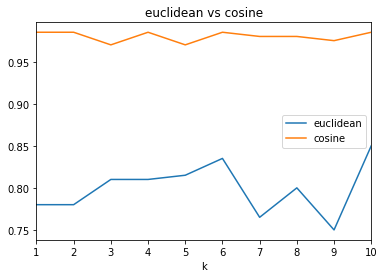

In [43]:
df.plot(x="k", title="euclidean vs cosine")

When comparing k=1 through k=10, it appears that cosine similiarty has a higher accuracy than euclidean distance for all values of K.


# 1D

In [46]:
#D
Training_DF = pd.DataFrame([(train_table.T!=0).sum(1)]).T
Training_DF

,0
0,98
1,61
2,43
3,35
4,26
...,...
795,24
796,33
797,74
798,2


In [75]:
Testing_DF = pd.DataFrame([(test_table.T!=0).sum(1)]).T
Testing_DF

,0
0,117
1,47
2,50
3,243
4,54
...,...
195,33
196,171
197,9
198,59


In [78]:
Train_NMatrix=np.ones(np.shape(train_table), dtype=float)*train_table.shape[0]
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(Train_NMatrix)

[[5500. 5500. 5500. ... 5500. 5500. 5500.]
 [5500. 5500. 5500. ... 5500. 5500. 5500.]
 [5500. 5500. 5500. ... 5500. 5500. 5500.]
 ...
 [5500. 5500. 5500. ... 5500. 5500. 5500.]
 [5500. 5500. 5500. ... 5500. 5500. 5500.]
 [5500. 5500. 5500. ... 5500. 5500. 5500.]]


In [79]:
IDF = np.log2(np.divide(Train_NMatrix.T, np.array(Training_DF)))

In [81]:
print(IDF)

[[ 5.81  5.81  5.81 ...  5.81  5.81  5.81]
 [ 6.49  6.49  6.49 ...  6.49  6.49  6.49]
 [ 7.    7.    7.   ...  7.    7.    7.  ]
 ...
 [ 6.22  6.22  6.22 ...  6.22  6.22  6.22]
 [11.43 11.43 11.43 ... 11.43 11.43 11.43]
 [ 6.09  6.09  6.09 ...  6.09  6.09  6.09]]


In [77]:
train_table.shape[0]

5500

In [83]:
train_TD_IDF = train_table.T * IDF

In [89]:
Test_NMatrix=np.ones(np.shape(test_table), dtype=float)*test_table.shape[0]
np.set_printoptions(precision=2,suppress=True,linewidth=120)

In [93]:
test_IDF = np.log2(np.divide(Test_NMatrix.T, np.array(Testing_DF)))

In [94]:
print(test_IDF)

[[5.55 5.55 5.55 ... 5.55 5.55 5.55]
 [6.87 6.87 6.87 ... 6.87 6.87 6.87]
 [6.78 6.78 6.78 ... 6.78 6.78 6.78]
 ...
 [9.26 9.26 9.26 ... 9.26 9.26 9.26]
 [6.54 6.54 6.54 ... 6.54 6.54 6.54]
 [7.97 7.97 7.97 ... 7.97 7.97 7.97]]


In [95]:
test_TD_IDF = test_table.T * test_IDF

In [96]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 1, measure=1)
error = 1-error
print(error)

0.985


In [98]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 2, measure=1)
error = 1-error
print(error)

0.985


In [99]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 3, measure=1)
error = 1-error
print(error)

0.97


In [100]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 4, measure=1)
error = 1-error
print(error)

0.99


In [101]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 5, measure=1)
error = 1-error
print(error)

0.97


In [102]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 6, measure=1)
error = 1-error
print(error)

0.985


In [103]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 7, measure=1)
error = 1-error
print(error)

0.98


In [104]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 8, measure=1)
error = 1-error
print(error)

0.98


In [105]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 9, measure=1)
error = 1-error
print(error)

0.975


In [106]:
error = evaluation(train_TD_IDF, train_labels, test_TD_IDF, test_labels,k= 10, measure=1)
error = 1-error
print(error)

0.985


In [107]:
df = pd.DataFrame(np.array([[1,0.985], [2, 0.985], [3, 0.97], [4, 0.99],
                           [5, 0.97], [6, 0.985], [7, 0.98], [8, 0.98],
                            [9, 0.975], [10, 0.985]]),  columns=['k', 'cosine'])

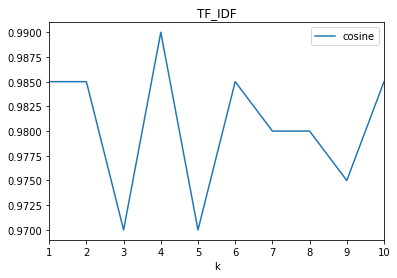

In [109]:
df.plot(x="k", title="TF_IDF")

TF_IDF appearsr to have a higer max accuracy at k=4 where accuracy = 99%, min is the same. Overall TF_IDF appears to have slightly better results.


# Problem 2

In [2]:
#Problem 2
table = pd.read_csv("bank_data.csv")

In [4]:
table.head

<bound method NDFrame.head of           id  age    income  children  gender      region married  car  \
0    ID12101   48  17546.00         1  FEMALE  INNER_CITY      NO   NO   
1    ID12102   40  30085.10         3    MALE        TOWN     YES  YES   
2    ID12103   51  16575.40         0  FEMALE  INNER_CITY     YES  YES   
3    ID12104   23  20375.40         3  FEMALE        TOWN     YES   NO   
4    ID12105   57  50576.30         0  FEMALE       RURAL     YES   NO   
..       ...  ...       ...       ...     ...         ...     ...  ...   
595  ID12696   61  47025.00         2  FEMALE  INNER_CITY      NO  YES   
596  ID12697   30   9672.25         0  FEMALE  INNER_CITY     YES  YES   
597  ID12698   31  15976.30         0  FEMALE        TOWN     YES  YES   
598  ID12699   29  14711.80         0    MALE  INNER_CITY     YES   NO   
599  ID12700   38  26671.60         0    MALE        TOWN      NO  YES   

    savings_acct current_acct mortgage  pep  
0             NO           NO      


# 2A

In [6]:
#A
bank_records = table[['age', 'income', 'gender', 'children', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']]
bank_records.head

<bound method NDFrame.head of      age    income  gender  children      region married  car savings_acct  \
0     48  17546.00  FEMALE         1  INNER_CITY      NO   NO           NO   
1     40  30085.10    MALE         3        TOWN     YES  YES           NO   
2     51  16575.40  FEMALE         0  INNER_CITY     YES  YES          YES   
3     23  20375.40  FEMALE         3        TOWN     YES   NO           NO   
4     57  50576.30  FEMALE         0       RURAL     YES   NO          YES   
..   ...       ...     ...       ...         ...     ...  ...          ...   
595   61  47025.00  FEMALE         2  INNER_CITY      NO  YES          YES   
596   30   9672.25  FEMALE         0  INNER_CITY     YES  YES          YES   
597   31  15976.30  FEMALE         0        TOWN     YES  YES          YES   
598   29  14711.80    MALE         0  INNER_CITY     YES   NO          YES   
599   38  26671.60    MALE         0        TOWN      NO  YES           NO   

    current_acct mortgage  
0    

In [8]:
bank_target = table.pep
bank_target.head

<bound method NDFrame.head of 0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
595     NO
596     NO
597    YES
598     NO
599    YES
Name: pep, Length: 600, dtype: object>

In [10]:
bank_matrix = pd.get_dummies(bank_records)
bank_matrix.head

<bound method NDFrame.head of      age    income  children  gender_FEMALE  gender_MALE  region_INNER_CITY  \
0     48  17546.00         1              1            0                  1   
1     40  30085.10         3              0            1                  0   
2     51  16575.40         0              1            0                  1   
3     23  20375.40         3              1            0                  0   
4     57  50576.30         0              1            0                  0   
..   ...       ...       ...            ...          ...                ...   
595   61  47025.00         2              1            0                  1   
596   30   9672.25         0              1            0                  1   
597   31  15976.30         0              1            0                  0   
598   29  14711.80         0              0            1                  1   
599   38  26671.60         0              0            1                  0   

     region_RURAL  re

In [2]:
from sklearn.model_selection import train_test_split

In [13]:
bank_train, bank_test, bank_target_train, bank_target_test = train_test_split(bank_matrix, bank_target, test_size=0.2, random_state=33)

print(bank_test.shape)
bank_test[0:5]

(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,32,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
366,59,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
131,61,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
448,53,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
337,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1



# 2B

In [3]:
#B
from sklearn import preprocessing

In [17]:
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)

bank_train_norm = min_max_scaler.transform(bank_train)
bank_train_norm = pd.DataFrame(bank_train_norm, columns=bank_train.columns, index=bank_train.index)

bank_test_norm = min_max_scaler.transform(bank_test)
bank_test_norm = pd.DataFrame(bank_test_norm, columns=bank_test.columns, index=bank_test.index)

In [18]:
bank_train_norm.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
381,0.571429,0.462547,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.795918,0.779122,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
86,0.142857,0.162411,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
83,0.346939,0.177708,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
523,0.326531,0.175889,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [4]:
from sklearn import neighbors, tree, naive_bayes

### KNN with 5 neighbors

In [20]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [21]:
knnpreds_test = knnclf.predict(bank_test_norm)

In [22]:
print(knnpreds_test)

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO']


In [5]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.68      0.73      0.70        66
         YES       0.63      0.57      0.60        54

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



In [6]:
from sklearn.metrics import confusion_matrix

In [27]:
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)

[[48 18]
 [23 31]]


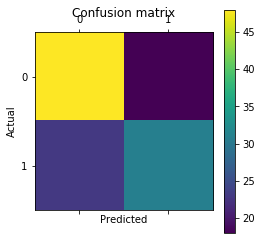

In [28]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
print(knnclf.score(bank_test_norm, bank_target_test))

0.6583333333333333


### KNN with 6 neighbors

In [37]:
n_neighbors = 6

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [38]:
knnpreds_test = knnclf.predict(bank_test_norm)

In [39]:
print(knnpreds_test)

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO']


In [40]:
print(classification_report(bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.67      0.73      0.70        66
         YES       0.62      0.56      0.59        54

    accuracy                           0.65       120
   macro avg       0.65      0.64      0.64       120
weighted avg       0.65      0.65      0.65       120



In [41]:
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)

[[48 18]
 [24 30]]


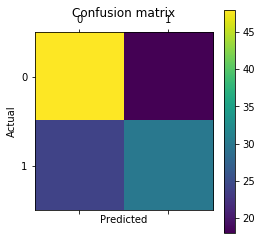

In [42]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
print(knnclf.score(bank_test_norm, bank_target_test))

0.65


### KNN with 7 neighbors

In [44]:
n_neighbors = 7

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [45]:
knnpreds_test = knnclf.predict(bank_test_norm)

In [46]:
print(knnpreds_test)

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO']


In [47]:
print(classification_report(bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.67      0.73      0.70        66
         YES       0.62      0.56      0.59        54

    accuracy                           0.65       120
   macro avg       0.65      0.64      0.64       120
weighted avg       0.65      0.65      0.65       120



In [48]:
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)

[[48 18]
 [24 30]]


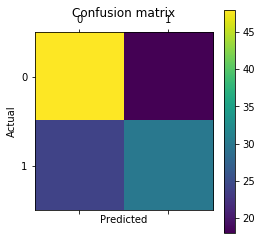

In [49]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [50]:
print(knnclf.score(bank_test_norm, bank_target_test))

0.65


### KNN with 8 neighbors

In [51]:
n_neighbors = 8

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [52]:
knnpreds_test = knnclf.predict(bank_test_norm)

In [53]:
print(knnpreds_test)

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO']


In [54]:
print(classification_report(bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.66      0.70      0.68        66
         YES       0.60      0.56      0.58        54

    accuracy                           0.63       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.63      0.63      0.63       120



In [55]:
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)

[[46 20]
 [24 30]]


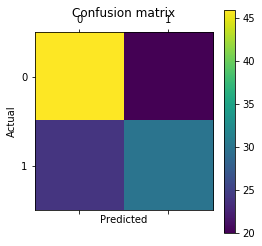

In [56]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [57]:
print(knnclf.score(bank_test_norm, bank_target_test))

0.6333333333333333



When testing KNN with neighbors of 5, 6, 7, and 8 We could see that the overall average accuracy of the model was going down as the number of neighbors increased. At K=5 we had an accuracy of 65.8% and at K=8 we had an accuracy of 63%.


# 2C

In [58]:
#C
treeclf = tree.DecisionTreeClassifier()

### Decision Tree

In [59]:
treeclf = treeclf.fit(bank_train, bank_target_train)

In [60]:
treepreds_test = treeclf.predict(bank_test)
print(treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [61]:
print(treeclf.score(bank_test, bank_target_test))

0.825


In [72]:
print(treeclf.score(bank_train, bank_target_train))

1.0


In [63]:
print(classification_report(bank_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.83      0.86      0.84        66
         YES       0.82      0.78      0.80        54

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120



In [65]:
treecm = confusion_matrix(bank_target_test, treepreds_test, labels=['YES','NO'])
print(treecm)

[[42 12]
 [ 9 57]]


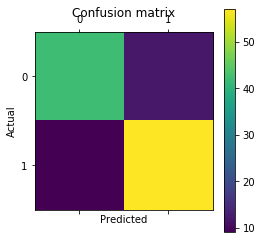

In [66]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###  Naive Bayes

In [67]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)
print(nbpreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [69]:
print(nbclf.score(bank_test, bank_target_test))

0.5916666666666667


In [73]:
print(nbclf.score(bank_train, bank_target_train))

0.65625


In [70]:
bayescm = confusion_matrix(bank_target_test, nbpreds_test, labels=['YES','NO'])
print(bayescm)

[[22 32]
 [17 49]]


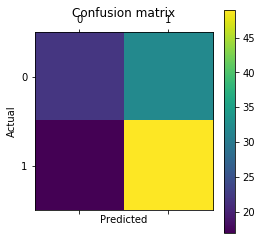

In [71]:
plt.matshow(bayescm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

It appears that Decision Tree classifier has the highest average accuracy for both the training and testing sets. The average accuracy for decision trees on the train data set was 100% while the testing data was 82.5%, this suggests that the model has high variance. The average accuracy for naive bayes on the train data was 65.6% while on the testing data it was 59.2%, this suggests a higher bias in the model.

# Problem 3

# 3A

In [6]:
table = pd.read_csv("adult-modified.csv")

In [7]:
table.shape

(10000, 8)

In [8]:
indexNames= table[(table['workclass'] =='?') | (table['marital-status'] == '?') | (table['race'] =='?') | (table['sex'] =='?') | (table['income'] =='?')].index

In [9]:
table.drop(indexNames , inplace=True)

In [10]:
table.shape

(9412, 8)

In [11]:
columns = table.shape[0]

In [12]:
columns

9412

In [13]:
table = table.replace('?', 0)
table

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,0,Private,2,Married,White,Male,53,<=50K


In [14]:
table['age'] = table['age'].astype(int)

In [15]:
table.age.dtype

dtype('int32')

In [16]:
table = table.replace(0, np.nan)

In [17]:
table["age"].fillna((table["age"].mean()), inplace=True)

In [18]:
table

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.000000,Private,10,Married,White,Male,60,>50K
9996,25.000000,Private,9,Single,White,Female,8,<=50K
9997,21.000000,Private,10,Single,Black,Male,40,<=50K
9998,38.364632,Private,2,Married,White,Male,53,<=50K


In [19]:
table["education"].fillna((table["education"].mean()), inplace=True)

In [20]:
table

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.000000,Private,10,Married,White,Male,60,>50K
9996,25.000000,Private,9,Single,White,Female,8,<=50K
9997,21.000000,Private,10,Single,Black,Male,40,<=50K
9998,38.364632,Private,2,Married,White,Male,53,<=50K


In [21]:
table["hours-per-week"].fillna((table["hours-per-week"].mean()), inplace=True)

In [22]:
table

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.000000,Private,10,Married,White,Male,60,>50K
9996,25.000000,Private,9,Single,White,Female,8,<=50K
9997,21.000000,Private,10,Single,Black,Male,40,<=50K
9998,38.364632,Private,2,Married,White,Male,53,<=50K


In [23]:
table[["age", "education", "hours-per-week"]].describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.364632,10.125266,41.080217
std,12.962034,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


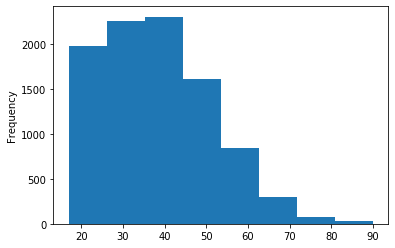

In [24]:
table["age"].plot(kind="hist", bins=8)

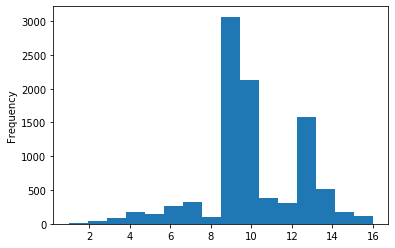

In [27]:
table["education"].plot(kind="hist", bins=16)

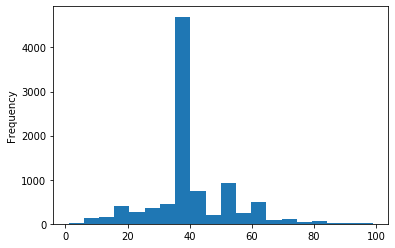

In [28]:
table["hours-per-week"].plot(kind="hist", bins=20)

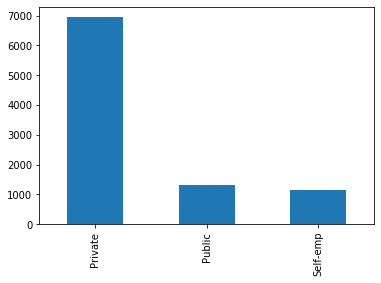

In [29]:
table["workclass"].value_counts().plot(kind='bar')

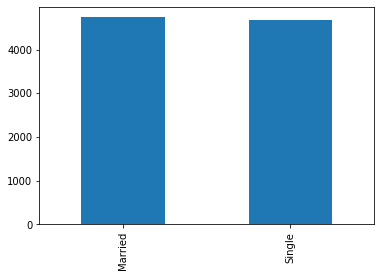

In [30]:
table["marital-status"].value_counts().plot(kind='bar')

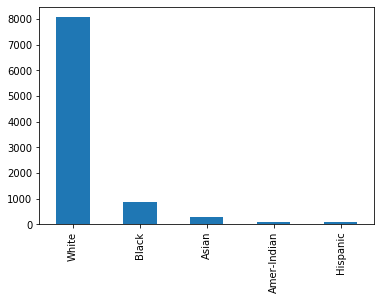

In [31]:
table["race"].value_counts().plot(kind='bar')

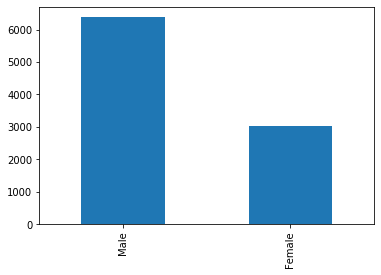

In [32]:
table["sex"].value_counts().plot(kind='bar')

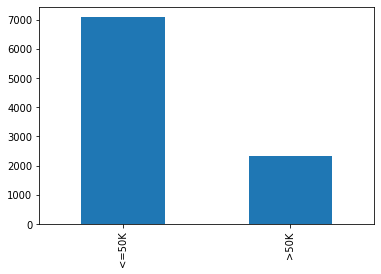

In [33]:
table["income"].value_counts().plot(kind='bar')

In [34]:
gg = pd.crosstab(table["education"], table["race"])
gg

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


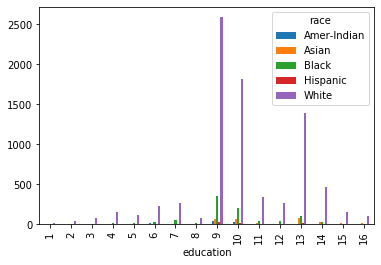

In [35]:
plot.show(gg.plot(kind="bar"))

In [36]:
gg = pd.crosstab(table["workclass"], table["income"])
gg

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


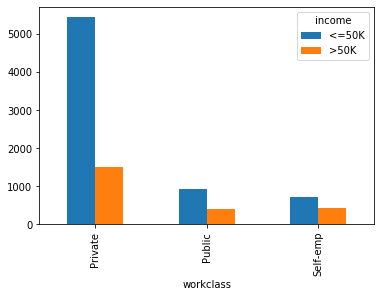

In [37]:
plot.show(gg.plot(kind="bar"))

In [38]:
gg = pd.crosstab(table["workclass"], table["race"])
gg

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


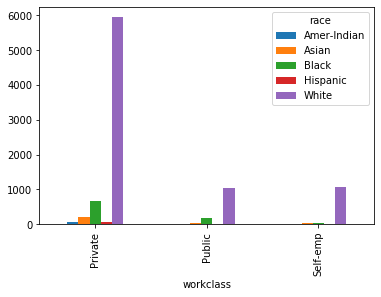

In [39]:
plot.show(gg.plot(kind="bar"))

In [40]:
gg = pd.crosstab(table["income"], table["race"])
gg

race,Amer-Indian,Asian,Black,Hispanic,White
income,,,,,
<=50K,83,224,773,69,5944
>50K,9,67,119,6,2118


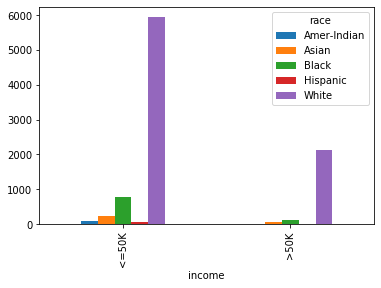

In [41]:
plot.show(gg.plot(kind="bar"))

In [42]:
gg =gg.T
gg

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [43]:
gg["percent_low_income"] = gg["<=50K"]/(gg["<=50K"]+gg[">50K"])
gg

income,<=50K,>50K,percent_low_income
race,,,
Amer-Indian,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispanic,69,6,0.920000
White,5944,2118,0.737286


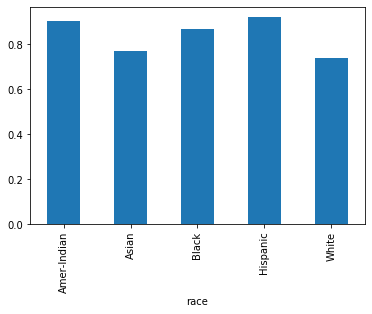

In [44]:
plot.show(gg["percent_low_income"].plot(kind="bar"))

From this analysis, we can see that Hispanics have the highest percent low income rate at 92% followed by American Indians at 90.2%. The lowest percent low income belongs to White at 73.7%.

Private employment seems to have the highest low income rate.
9 years of education also has the highest low income rate across all races.

In [45]:
gg = pd.crosstab(table["income"], table["education"])
gg

education,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income,,,,,,,,,,,,,,,,
<=50K,12,45,76,164,135,245,310,93,2539,1737,298,221,921,225,45,27
>50K,0,1,5,16,7,23,14,7,526,388,91,83,656,290,126,86


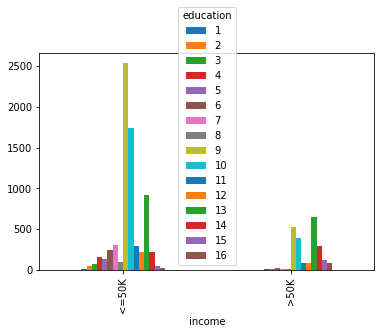

In [46]:
plot.show(gg.plot(kind="bar"))

9 years of education makes up the highest amount of people that fall under the low income group and 13 years of education makes up the highest amount of people that fall under the high income group. 

In [47]:
gg = pd.crosstab(table["income"], table["hours-per-week"])
gg

hours-per-week,1,2,3,4,5,6,7,8,9,10,...,84,85,87,88,89,90,94,97,98,99
income,,,,,,,,,,,,,,,,,,,,,
<=50K,1,4,6,5,9,13,3,30,6,75,...,6,4,1,1,1,7,1,0,3,9
>50K,1,0,0,0,3,1,1,3,0,4,...,5,1,0,0,0,3,0,1,1,7


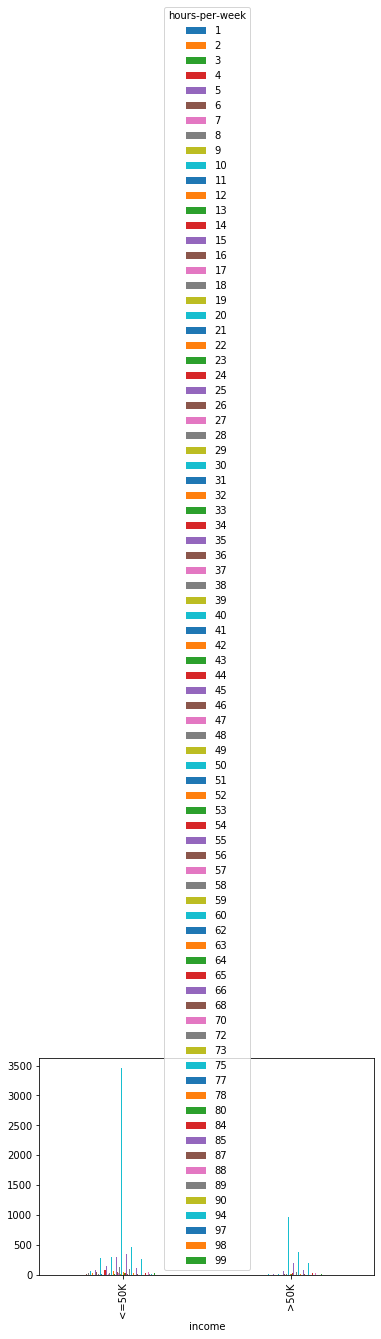

In [48]:
plot.show(gg.plot(kind="bar"))

Too much information to distinguish whats going on.

In [49]:
gg = pd.crosstab(table["income"], table["sex"])
gg

sex,Female,Male
income,,
<=50K,2669,4424
>50K,360,1959


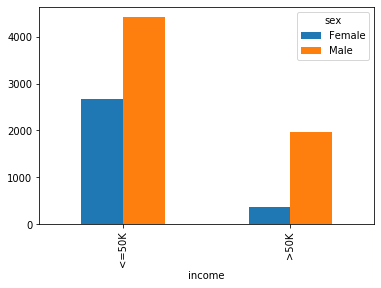

In [50]:
plot.show(gg.plot(kind="bar"))

At a glance it appears that the ratio of women that fall under the low income group compared to the high income group is a lot higher then the ratio of men that fall under the low income group compared to the high income group.

In [51]:
gg = pd.crosstab(table["income"], table["marital-status"])
gg

marital-status,Married,Single
income,,
<=50K,2730,4363
>50K,2007,312


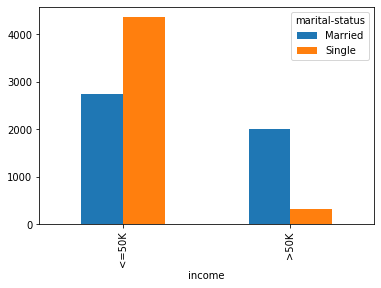

In [52]:
plot.show(gg.plot(kind="bar"))

At a glance it appears that the ratio of low income singles compared to high income singles is a lot higher then the ratio of low income couples compared to high income couples.

# 3B

In [25]:
table_matrix = pd.get_dummies(table)

In [26]:
table_matrix.head

<bound method NDFrame.head of             age  education  hours-per-week  workclass_Private  \
0     39.000000         13              40                  0   
1     50.000000         13              13                  0   
2     38.000000          9              40                  1   
3     53.000000          7              40                  1   
4     28.000000         13              40                  1   
...         ...        ...             ...                ...   
9995  38.000000         10              60                  1   
9996  25.000000          9               8                  1   
9997  21.000000         10              40                  1   
9998  38.364632          2              53                  1   
9999  39.000000         10              40                  1   

      workclass_Public  workclass_Self-emp  marital-status_Married  \
0                    1                   0                       0   
1                    0                   1       

In [27]:
table_matrix = table_matrix.drop(columns=['income_<=50K'])
table_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1,0
9998,38.364632,2,53,1,0,0,1,0,0,0,0,0,1,0,1,0


In [28]:
people_target = table_matrix['income_>50K']
people_target.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: income_>50K, Length: 9412, dtype: uint8>

In [29]:
table_records= table_matrix.drop(columns=['income_>50K'])

In [30]:
table_records

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9998,38.364632,2,53,1,0,0,1,0,0,0,0,0,1,0,1


In [35]:
people_train, people_test, people_target_train, people_target_test = train_test_split(table_records, people_target, test_size=0.2, random_state=33)

In [40]:
people_train.shape

(7529, 15)

In [41]:
min_max_scaler = preprocessing.MinMaxScaler().fit(people_train)

people_train_norm = min_max_scaler.transform(people_train)
people_train_norm = pd.DataFrame(people_train_norm, columns=people_train.columns, index=people_train.index)

people_test_norm = min_max_scaler.transform(people_test)
people_test_norm = pd.DataFrame(people_test_norm, columns=people_test.columns, index=people_test.index)

In [42]:
people_train_norm.head

<bound method NDFrame.head of            age  education  hours-per-week  workclass_Private  \
287   0.452055   0.600000        0.448980                1.0   
7852  0.328767   0.533333        0.397959                1.0   
5887  0.292666   0.533333        0.500000                0.0   
4791  0.369863   0.533333        0.397959                1.0   
6540  0.054795   0.600000        0.448980                1.0   
...        ...        ...             ...                ...   
58    0.328767   0.533333        0.479592                1.0   
619   0.397260   0.933333        0.448980                1.0   
6239  0.424658   0.600000        0.397959                1.0   
2612  0.191781   0.533333        0.397959                0.0   
7644  0.000000   0.266667        0.397959                1.0   

      workclass_Public  workclass_Self-emp  marital-status_Married  \
287                0.0                 0.0                     0.0   
7852               0.0                 0.0                   

### Naive Bayes

In [43]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(people_train_norm, people_target_train)
nbpreds_test = nbclf.predict(people_test_norm)
print(nbpreds_test)

[1 1 0 ... 1 0 1]


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cv_scores = cross_val_score(nbclf, table_records, people_target, cv=10)
print(cv_scores)

[0.72823779 0.70488323 0.73142251 0.70456961 0.73326249 0.70669501
 0.7120085  0.7183847  0.73113709 0.70744681]


In [46]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


### Decision Tree

In [48]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy')

In [49]:
treeclf = treeclf.fit(people_train_norm, people_target_train)

In [52]:
treepreds_test = treeclf.predict(people_test_norm)
print(treepreds_test)

[0 1 0 ... 0 0 1]


In [53]:
cv_scores = cross_val_score(treeclf, table_records, people_target, cv=10)
print(cv_scores)

[0.76433121 0.75265393 0.76539278 0.77577046 0.76408077 0.75239107
 0.75557917 0.79383634 0.77470776 0.75744681]


In [54]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.77 (+/- 0.02)


### Linear Discriminant Analysis

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [57]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(people_train_norm, people_target_train)
ldpreds_test = ldclf.predict(people_test_norm)
print(ldpreds_test)

[1 0 0 ... 0 0 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [58]:
cv_scores = cross_val_score(ldclf, table_records, people_target, cv=10)
print(cv_scores)

[0.81210191 0.80997877 0.79193206 0.81721573 0.80977683 0.78958555
 0.79914984 0.80871413 0.82040383 0.81702128]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

In [59]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.81 (+/- 0.02)


LDA has the highest accuracy with 0.81 +/-0.02 and Naive Bayes has the lowest accuracy with 0.72 +/- 0.02

# 3C

In [60]:
from sklearn.tree import export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

tree = export_graphviz(treeclf,out_file='tree.dot', feature_names=people_train_norm.columns)

#tree = export_graphviz(treeclf, out_file=None, feature_names=people_train.columns)
graph = Source(tree)

In [79]:
display(SVG(graph.pipe(format='svg')))

Error: <stdin>: syntax error in line 1 near 'None'


CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1. [stderr: b"Error: <stdin>: syntax error in line 1 near 'None'\r\n"]

In [61]:
system(dot -Tpng tree.dot -o dtree.png)

['dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.511721 to fit']